<a href="https://colab.research.google.com/github/aargreer/cloudproject/blob/master/Data_processing_and_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.naive_bayes import MultinomialNB  # NB
from sklearn.neighbors import KNeighborsClassifier  # k-NN
from sklearn.linear_model import SGDClassifier  # logistic regression
from sklearn.tree import DecisionTreeClassifier  # DT
from sklearn.svm import LinearSVC  # linear SVM
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier


plt.style.use('fivethirtyeight')

In [ ]:
insurance_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')

Data cleansing 



In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [ ]:
insurance_data.sex.unique()

array(['female', 'male'], dtype=object)

Data distribution analysys


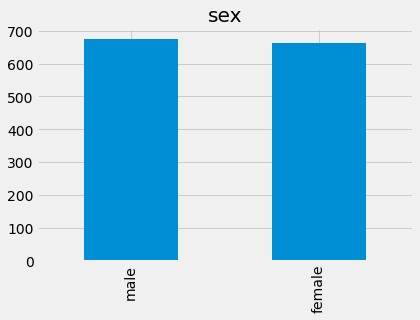

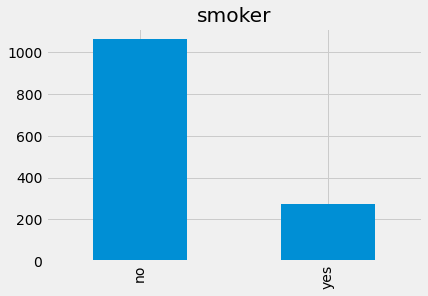

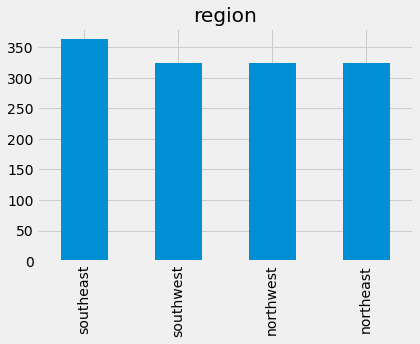

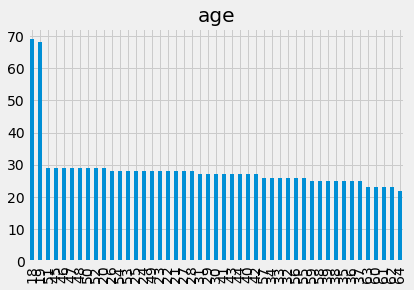

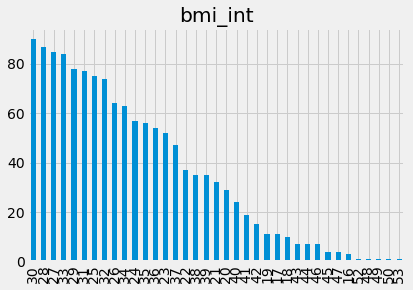

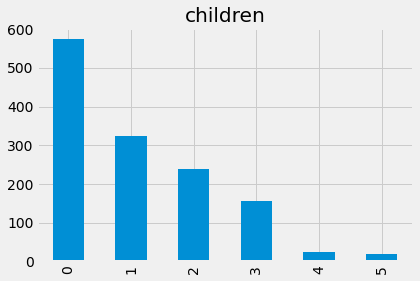

In [ ]:
insurance_data['bmi_int'] = insurance_data['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi_int','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    insurance_data = insurance_data.sort_values(by=[v])
    insurance_data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

In [ ]:
correlation = insurance_data.corr()
correlation

,age,bmi,children,expenses,bmi_int
age,1.000000,0.109341,0.042469,0.299008,0.109659
bmi,0.109341,1.000000,0.012645,0.198576,0.998884
children,0.042469,0.012645,1.000000,0.067998,0.011786
expenses,0.299008,0.198576,0.067998,1.000000,0.197669
bmi_int,0.109659,0.998884,0.011786,0.197669,1.000000


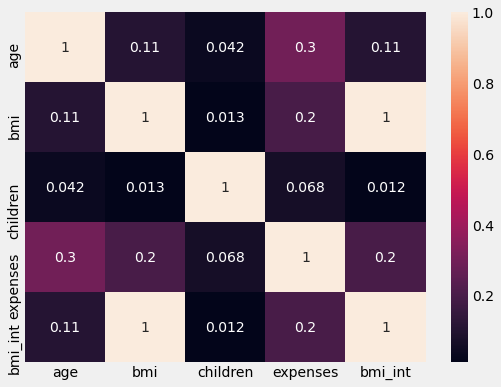

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot = True)

makes a coy of original data to test two models without having errors


In [ ]:
ols_data=insurance_data

In [ ]:
import copy
data= copy.copy(ols_data)

In [ ]:
data.sex.replace({'male':1,'female':0},inplace=True)
data.smoker.replace({'yes':1,'no':0},inplace=True)

In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,region,expenses,bmi_int
423,25,1,30.6,0,0,4,2727.40,30
581,19,1,30.6,0,0,3,1639.56,30
550,63,1,30.8,0,0,2,13390.56,30
887,36,0,30.0,0,0,3,5272.18,30
1138,33,1,30.3,0,0,1,3704.35,30
503,19,1,30.3,0,1,1,32548.34,30
1042,20,1,30.7,0,1,4,33475.82,30
1158,20,0,30.6,0,0,4,2459.72,30
322,34,1,30.8,0,1,2,35491.64,30
381,55,1,30.7,0,1,4,42303.69,30


In [ ]:
data["region"] = insurance_data.region.replace({'southeast':1,'southwest':2,'northwest':3,'northeast':4})

one least square regression to show estimate of what patients will pay based on age , sex, region

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X1=data.drop(columns='expenses')
y1=data[['expenses']]
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,test_size=0.4)
Fake = sm.add_constant(X1)
model = sm.OLS(y1,X1)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               expenses   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1332.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):                        0.00
Time:                        03:19:52   Log-Likelihood:                         -13614.
No. Observations:                1338   AIC:                                  2.724e+04
Df Residuals:                    1331   BIC:                                  2.728e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,expenses,bmi_int
423,25,male,30.6,0,no,northeast,2727.40,30
581,19,male,30.6,0,no,northwest,1639.56,30
550,63,male,30.8,0,no,southwest,13390.56,30
887,36,female,30.0,0,no,northwest,5272.18,30
1138,33,male,30.3,0,no,southeast,3704.35,30
503,19,male,30.3,0,yes,southeast,32548.34,30
1042,20,male,30.7,0,yes,northeast,33475.82,30
1158,20,female,30.6,0,no,northeast,2459.72,30
322,34,male,30.8,0,yes,southwest,35491.64,30
381,55,male,30.7,0,yes,northeast,42303.69,30


using extra tree regression for prediction based on the user input

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
import warnings

print('Model training and evaluating\n\n')
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

insurance_data['sex'] = le_sex.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = le_smoker.fit_transform(insurance_data['smoker'])
insurance_data['region'] = le_region.fit_transform(insurance_data['region'])

variables = ['sex','smoker','region','age','bmi','children']

X = insurance_data[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = insurance_data['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Model training and evaluating


ExtraTreesRegressor evaluating result:
Train MAE:  17.889140186948655
Train RMSE:  413.7770113183114
Test MAE:  2794.6329975746285
Test RMSE:  4920.4057787626125


In [ ]:
filename = 'Expense_Y'
outfile = open(filename,'wb')
pickle.dump(Y,outfile)
outfile.close()

In [ ]:
y_test.head(5)

666      8703.46
504      5974.38
461     22144.03
1187    13844.80
218      3392.98
Name: expenses, dtype: float64

In [ ]:
y_train.head(5)

495     1967.02
791     1252.41
36     15612.19
937     8965.80
96     12105.32
Name: expenses, dtype: float64

In [ ]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))


Feature importance ranking


1.smoker(0.604629)
2.bmi(0.197603)
3.age(0.135657)
4.children(0.027218)
5.region(0.023868)
6.sex(0.011025)


In [ ]:
print('Predicting on new data\n\n')

billy = ['male','yes','southeast',25,30.5,2]
print('Billy - ',str(billy))

billy[0] = le_sex.transform([billy[0]])[0] 
billy[1] = le_smoker.transform([billy[1]])[0] 
billy[2] = le_region.transform([billy[2]])[0] 

X = sc.transform([billy])

cost_for_billy = regressor.predict(X)[0]
print('Cost for Billy = ',cost_for_billy,'\n\n')


dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] = le_sex.transform([dennis[0]])[0] 
dennis[1] = le_smoker.transform([dennis[1]])[0] 
dennis[2] = le_region.transform([dennis[2]])[0] 

X = sc.transform([dennis])

cost_for_dennis = regressor.predict(X)[0]

print('Cost for Dennis = ',cost_for_dennis)

Predicting on new data


Billy -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Billy =  32879.767449999956 


Dennis -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Dennis =  8616.840800000004


In [ ]:
y_train.to_csv("train.csv",index=False)
y_test.to_csv("test.csv",index=False)